# Checking New ICS Energy Loss Spectra

## Initialization

In [2]:
%load_ext autoreload
import sys
sys.path.append("..")

In [3]:
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]


from astropy.io import fits

import numpy as np
import pickle
import darkhistory.physics as phys
import darkhistory.spec.spectools as spectools
import darkhistory.spec.transferfunction as tf
from darkhistory.spec.spectrum import Spectrum
import darkhistory.history.tla as tla

from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec_series
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec_diff

from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.ics.ics_cooling import get_ics_cooling_tf

np.set_printoptions(threshold=np.nan,precision=10)

In [4]:
nEe = 50
nEp = 60

Emax_rel = 1e10
Emin_rel = 1e-8

dlnEp = np.log(Emax_rel/Emin_rel)/nEp
lowengEp = Emin_rel*np.exp((np.arange(nEp)+0.5)*dlnEp)        

dlnEe = np.log(Emax_rel/Emin_rel)/nEe
lowengEe = Emin_rel*np.exp((np.arange(nEe)+0.5)*dlnEe)

In [6]:
test_series_old = engloss_spec_series(lowengEe, lowengEp, phys.TCMB(1000))
# test_series_new = nonrel_spec_series(lowengEe, lowengEp, phys.TCMB(1000), spec_type='new')

Computing energy loss spectrum by analytic series...
Computing upscattering loss spectra...
Computing series 1/7...
Computing series 2/7...
Computing series 3/7...
Computing series 4/7...
Computing series 5/7...
Computing series 6/7...
Computing series 7/7...
Computing downscattering loss spectra...
Computing series 1/7...
Computing series 2/7...
Computing series 3/7...
Computing series 4/7...
Computing series 5/7...
Computing series 6/7...
Computing series 7/7...


/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


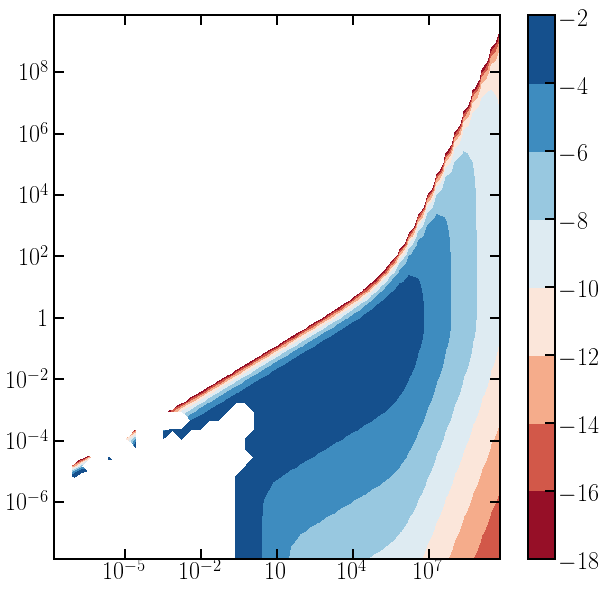

In [7]:
plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_series_old)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_series_new)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.transpose(test_series_new/test_series_old), levels=[0.8, 0.9, 0.95, 1., 1.05, 1.10, 1.20, 1.40], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [9]:
test_spec_diff_old = engloss_spec_diff(lowengEe, lowengEp, phys.TCMB(1000))
# test_spec_diff_new = nonrel_spec_diff(lowengEe, lowengEp, phys.TCMB(1000), spec_type='new')

Computing energy loss spectrum by beta expansion...
(1/5) Computing F1_up - F1_down term...
(2/5) Computing F0_up - F0_down term...
(3/5) Computing F0_up + F0_down term...
(4/5) Computing F_inv_up - F_inv_down term...
(5/5) Computing F_rem term...
Computation by expansion in beta complete!


/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


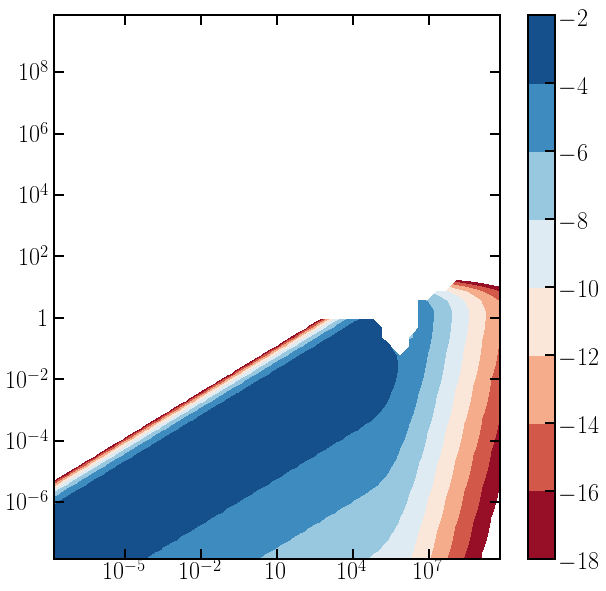

In [11]:
plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_diff_old)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_diff_new[0])), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

# plt.figure()

# plt.contourf(lowengEe, lowengEp, np.transpose(test_spec_diff_new[0]/test_spec_diff_old[0]), levels=[0.8, 0.9, 0.95, 1., 1.05, 1.10, 1.20, 1.40], cmap = 'RdBu')
# plt.colorbar()
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [13]:
test_spec_old = nonrel_spec(lowengEe, lowengEp, phys.TCMB(1000), spec_type='old')
test_spec_new = nonrel_spec(lowengEe, lowengEp, phys.TCMB(1000), spec_type='new')

Initializing...
Computing spectra by an expansion in beta...
Computing Q and K terms...
Computing H and G terms...
Computation by expansion in beta complete!
Computing errors for beta expansion method...
Computing spectra by analytic series...
Computing series 1/8...
Computing series 2/8...
Computing series 3/8...
Computing series 4/8...
Computing series 5/8...
Computing series 6/8...
Computing series 7/8...
Computing series 8/8...
Computation by analytic series complete!
Spectrum computed!
Initializing...
Computing spectra by an expansion in beta...
Computing term...
Computation by expansion in beta complete!
Computing errors for beta expansion method...
Computing spectra by analytic series...
Computing series 1/8...
Computing series 2/8...
Computing series 3/8...
Computing series 4/8...
Computing series 5/8...
Computing series 6/8...
Computing series 7/8...
Computing series 8/8...
Computing new series 1/4...
Computing new series 2/4...
Computing new series 3/4...
Computing new series

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


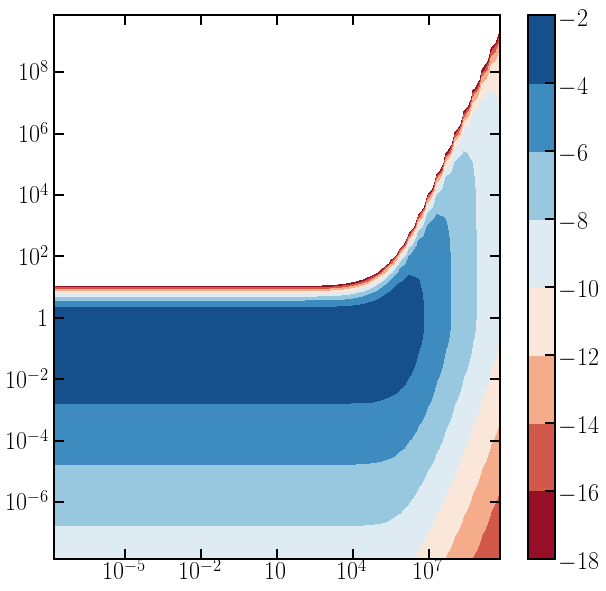

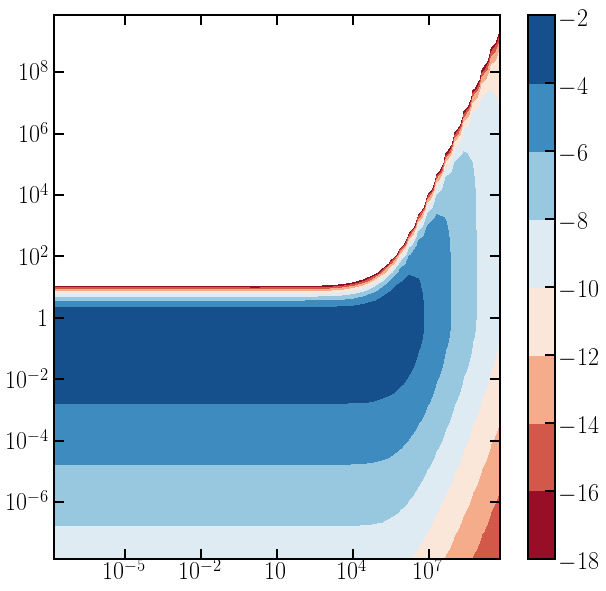

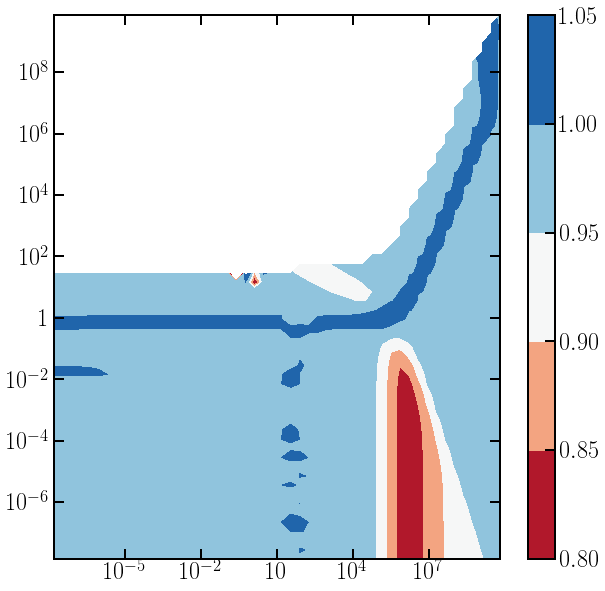

In [16]:
plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_old._grid_vals)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.figure()

plt.contourf(lowengEe, lowengEp, np.log10(np.transpose(test_spec_new._grid_vals)), levels=[-18, -16, -14, -12,-10, -8, -6, -4, -2], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.figure()

plt.contourf(lowengEe, lowengEp, np.transpose(test_spec_new._grid_vals/test_spec_old._grid_vals), levels=[0.8, 0.85, 0.9, 0.95, 1., 1.05], cmap = 'RdBu')
plt.colorbar()
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')